# Required Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
import seaborn as sns
import itertools
import datetime as dt
import tqdm.notebook as tq
import pytz
import numpy as np
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
source_data_fig2 = pd.read_excel('data/Source data.xlsx',sheet_name='Figure 2',index_col=0)
source_data_fig4 = pd.read_excel('data/Source data.xlsx',sheet_name='Figure 4',index_col=0)
source_data_fig5 = pd.read_excel('data/Source data.xlsx',sheet_name='Figure 5',index_col=0)
source_data_fig6 = pd.read_excel('data/Source data.xlsx',sheet_name='Figure 6')

# Plotting the figures

## Figure 2

The following code plots Figure 2 from the paper, using the provided Source Data.

Text(16.75, -13.2, 'Paused charging')

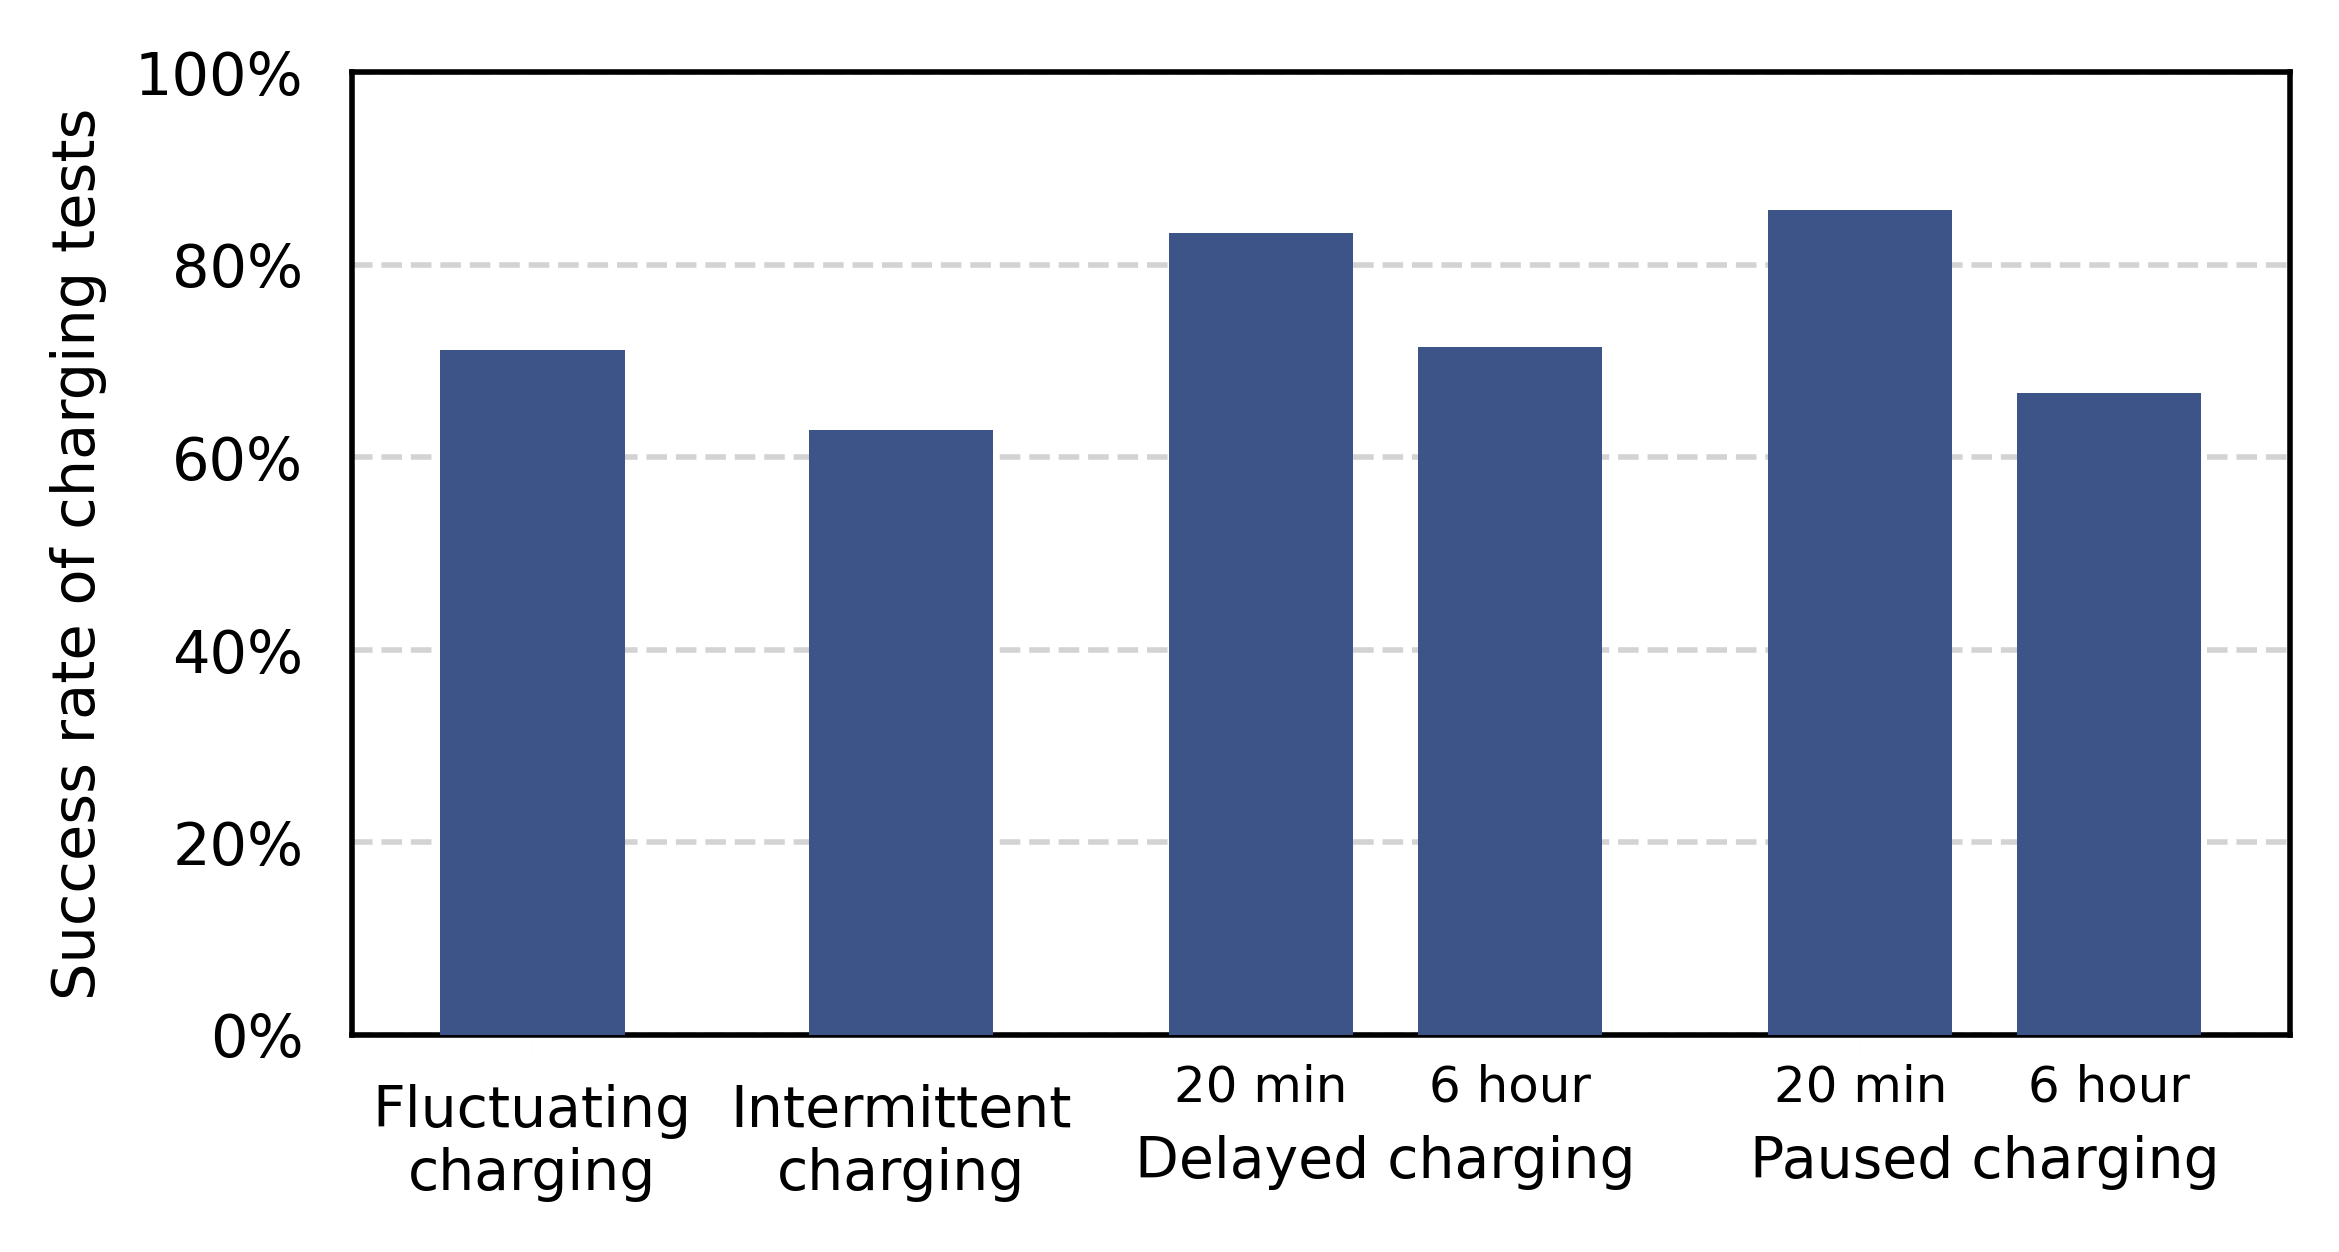

In [4]:
fig=plt.figure(figsize=(5,2.5),dpi=500)
fmt = '%.0f%%' 
ax1=plt.subplot(111)
font='DejaVu Sans'
xpos=[1,4+1,7+1.9,10+1.6,13+2.4,16+2.1]
plt.bar(xpos,source_data_fig2['Value']*100,color='#3c5488',width=2,zorder=5)
xticklist=['Fluctuating\ncharging',
           'Intermittent\ncharging',
           '',
           '',
           '',
           '']
plt.xticks(ticks=xpos,labels=xticklist,fontsize=8.2)
plt.ylim(0,100)
plt.grid(axis='y',color='lightgrey',linestyle='--',zorder=0)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
ax1.tick_params(width=0.001)
plt.ylabel('Success rate of charging tests',font=font,fontsize=8.5)
plt.yticks(font=font,fontsize=8.5)
plt.text(8.9,-5.5,'20 min',fontsize=7.2,font=font,va='center',ha='center')
plt.text(11.6,-5.5,'6 hour',fontsize=7.2,font=font,va='center',ha='center')
plt.text(15.4,-5.5,'20 min',fontsize=7.2,font=font,va='center',ha='center')
plt.text(18.1,-5.5,'6 hour',fontsize=7.2,font=font,va='center',ha='center')
plt.text(10.25,-13.2,'Delayed charging',fontsize=8.2,font=font,va='center',ha='center')
plt.text(16.75,-13.2,'Paused charging',fontsize=8.2,font=font,va='center',ha='center')


## Figure 4

The following code plots Figure 4 from the paper, using the provided Source Data.

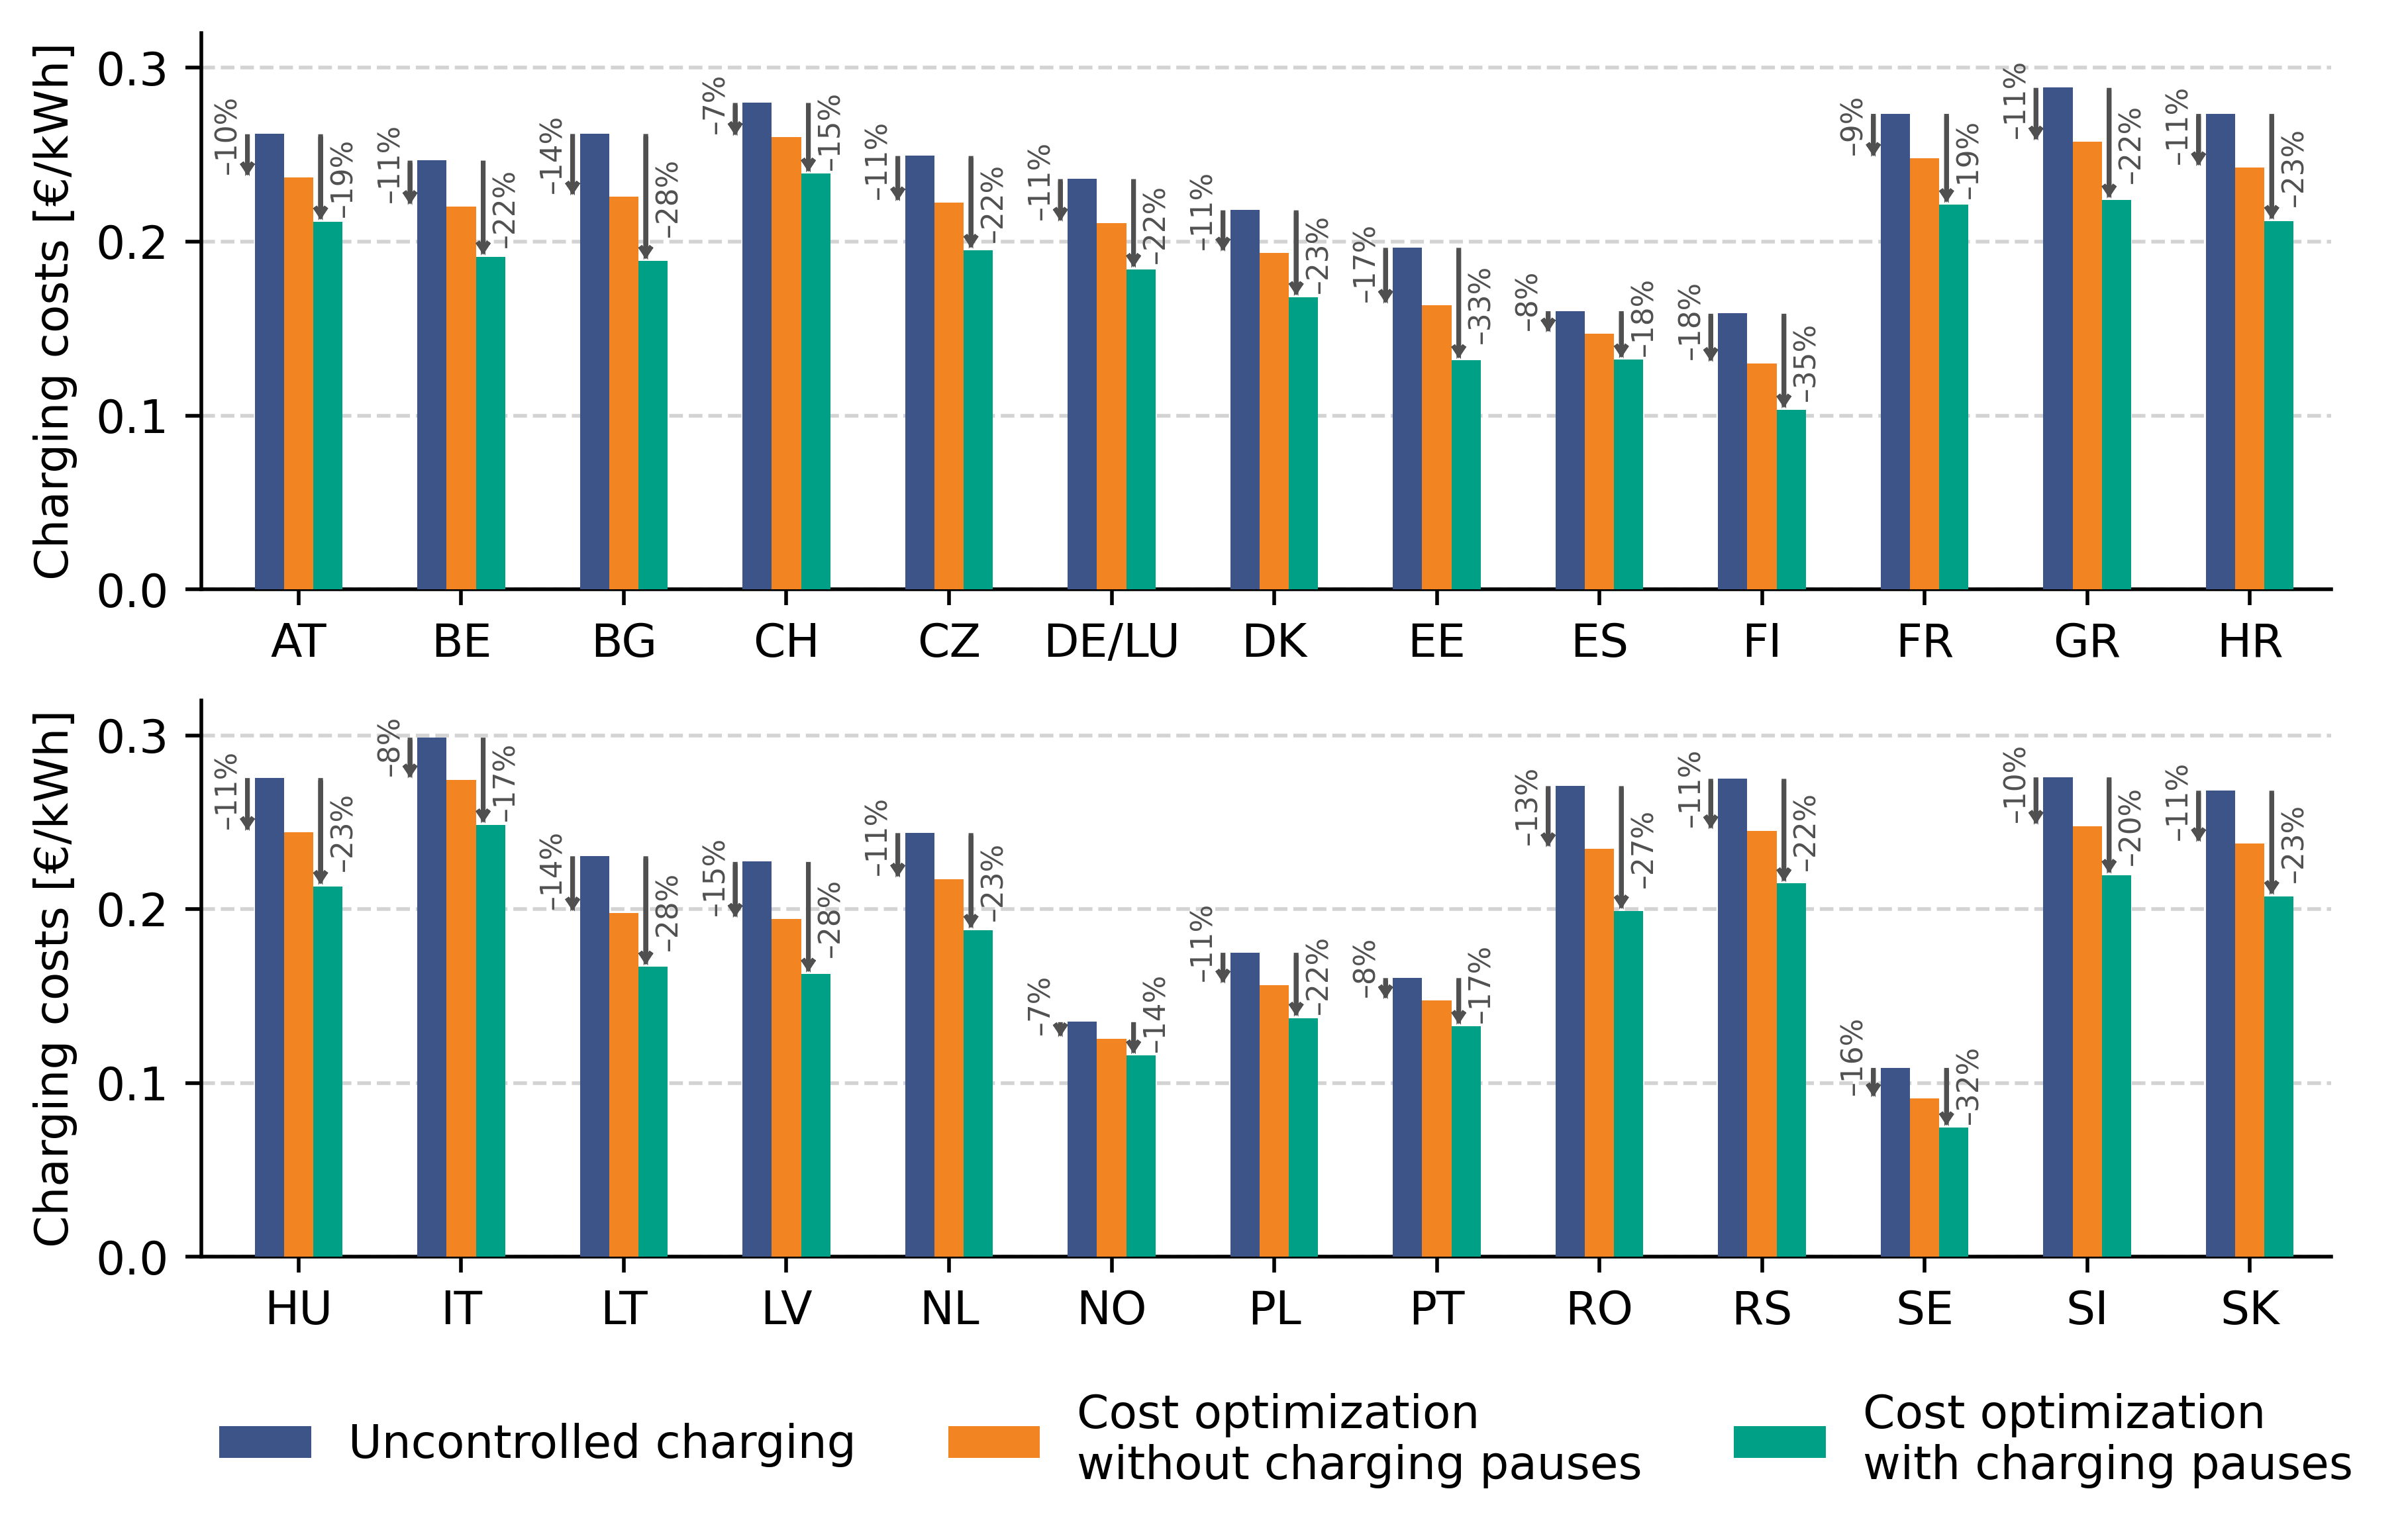

In [5]:
source_data_fig4['cost reduction paused charging']=(source_data_fig4['Costs - paused charging (euro/kWh)']/source_data_fig4['Costs - uncontrolled charging']-1)
source_data_fig4['cost reduction no paused charging']=(source_data_fig4['Costs - no paused charging (euro/kWh)']/source_data_fig4['Costs - uncontrolled charging']-1)


fig=plt.figure(figsize=(8.3,4.8),dpi=500)
barwidth=0.18
plt.subplots_adjust(wspace=0.13, hspace=0.2)

ax1=plt.subplot(2,1,1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ticks_nochargingpause=[x for x in range(1,14)]
ticks_chargingpause=[x+barwidth for x in range(1,14)]
ticks_uncontrolled=[x-barwidth for x in range(1,14)]
plt.bar(ticks_uncontrolled,source_data_fig4['Costs - uncontrolled charging'][:13],width=barwidth,color='#3c5488',zorder=100)
plt.bar(ticks_nochargingpause,source_data_fig4['Costs - no paused charging (euro/kWh)'][:13],width=barwidth,color='#F28522',zorder=100)
plt.bar(ticks_chargingpause,source_data_fig4['Costs - paused charging (euro/kWh)'][:13],width=barwidth,color='#00a087',zorder=100)
plt.xticks(ticks=ticks_nochargingpause,labels=source_data_fig4.index[:13])
plt.xlim(0.4,13.5)
plt.ylim(0,0.32)
plt.ylabel('Charging costs [€/kWh]')
plt.grid(axis='y',color='lightgrey',linestyle='--',zorder=-1000)

for j,country in enumerate(source_data_fig4.index[:13]):
    plt.arrow(ticks_uncontrolled[j]-0.135,source_data_fig4.loc[country,'Costs - uncontrolled charging']-0.0015,0,-(source_data_fig4.loc[country,'Costs - uncontrolled charging']-source_data_fig4.loc[country,'Costs - no paused charging (euro/kWh)'])+0.005,
              head_width=0.07,head_length=0.005,length_includes_head=True,overhang=0.8,color='#505050',zorder=100)
    plt.text(ticks_uncontrolled[j]-0.255,(source_data_fig4.loc[country,'Costs - no paused charging (euro/kWh)'])+0.002,'–'+str(-int(round(source_data_fig4.loc[country,'cost reduction no paused charging']*100,0)))+'%',fontsize=6.3,rotation=90,va='bottom',ha='center',color='#505050',zorder=100)   

    plt.arrow(ticks_nochargingpause[j]+0.135,source_data_fig4.loc[country,'Costs - uncontrolled charging']-0.0015,0,-(source_data_fig4.loc[country,'Costs - uncontrolled charging']-source_data_fig4.loc[country,'Costs - paused charging (euro/kWh)'])+0.005,
              head_width=0.07,head_length=0.005,length_includes_head=True,overhang=0.8,color='#505050',zorder=100)
    if country in ['ES','CH']:
        plt.text(ticks_nochargingpause[j]+0.275,(source_data_fig4.loc[country,'Costs - paused charging (euro/kWh)'])+0.002,'–'+str(-int(round(source_data_fig4.loc[country,'cost reduction paused charging']*100,0)))+'%',fontsize=6.3,rotation=90,va='bottom',ha='center',color='#505050',zorder=100)   
    else:
        plt.text(ticks_nochargingpause[j]+0.275,(source_data_fig4.loc[country,'Costs - paused charging (euro/kWh)']+source_data_fig4.loc[country,'Costs - uncontrolled charging'])/2,'–'+str(-int(round(source_data_fig4.loc[country,'cost reduction paused charging']*100,0)))+'%',fontsize=6.3,rotation=90,va='center',ha='center',color='#505050',zorder=100)   

ax1=plt.subplot(2,1,2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.grid(axis='y',color='lightgrey',linestyle='--',zorder=-1000)
plt.bar(ticks_uncontrolled,source_data_fig4['Costs - uncontrolled charging'][13:],width=barwidth,color='#3c5488',label='Uncontrolled charging',zorder=100)
plt.bar(ticks_nochargingpause,source_data_fig4['Costs - no paused charging (euro/kWh)'][13:],width=barwidth,color='#F28522',label='Cost optimization\nwithout charging pauses',zorder=100)
plt.bar(ticks_chargingpause,source_data_fig4['Costs - paused charging (euro/kWh)'][13:],width=barwidth,color='#00a087',label='Cost optimization\nwith charging pauses',zorder=100)
plt.xticks(ticks=ticks_nochargingpause,labels=source_data_fig4.index[13:])
plt.xlim(0.4,13.5)
plt.ylim(0,0.32)
plt.ylabel('Charging costs [€/kWh]')
for j,country in enumerate(source_data_fig4.index[13:]):
    plt.arrow(ticks_uncontrolled[j]-0.135,source_data_fig4.loc[country,'Costs - uncontrolled charging']-0.0015,0,-(source_data_fig4.loc[country,'Costs - uncontrolled charging']-source_data_fig4.loc[country,'Costs - no paused charging (euro/kWh)'])+0.005,
              head_width=0.07,head_length=0.005,length_includes_head=True,overhang=0.8,color='#505050',zorder=100)
    plt.text(ticks_uncontrolled[j]-0.255,(source_data_fig4.loc[country,'Costs - no paused charging (euro/kWh)'])+0.002,'–'+str(-int(round(source_data_fig4.loc[country,'cost reduction no paused charging']*100,0)))+'%',fontsize=6.3,rotation=90,va='bottom',ha='center',color='#505050',zorder=100)   

    plt.arrow(ticks_nochargingpause[j]+0.135,source_data_fig4.loc[country,'Costs - uncontrolled charging']-0.0015,0,-(source_data_fig4.loc[country,'Costs - uncontrolled charging']-source_data_fig4.loc[country,'Costs - paused charging (euro/kWh)'])+0.005,
              head_width=0.07,head_length=0.005,length_includes_head=True,overhang=0.8,color='#505050',zorder=100)
    if country in ['NO','PT','SE','IT','PL']:
        plt.text(ticks_nochargingpause[j]+0.275,(source_data_fig4.loc[country,'Costs - paused charging (euro/kWh)'])+0.002,'–'+str(-int(round(source_data_fig4.loc[country,'cost reduction paused charging']*100,0)))+'%',fontsize=6.3,rotation=90,va='bottom',ha='center',color='#505050',zorder=100)   
    else:
        plt.text(ticks_nochargingpause[j]+0.275,(source_data_fig4.loc[country,'Costs - paused charging (euro/kWh)']+source_data_fig4.loc[country,'Costs - uncontrolled charging'])/2,'–'+str(-int(round(source_data_fig4.loc[country,'cost reduction paused charging']*100,0)))+'%',fontsize=6.3,rotation=90,va='center',ha='center',color='#505050',zorder=100)   
plt.legend(loc=(0,-0.45),ncol=3,frameon=False)    

## Figure 5

The following code plots Figure 5 from the paper, using the provided Source Data.

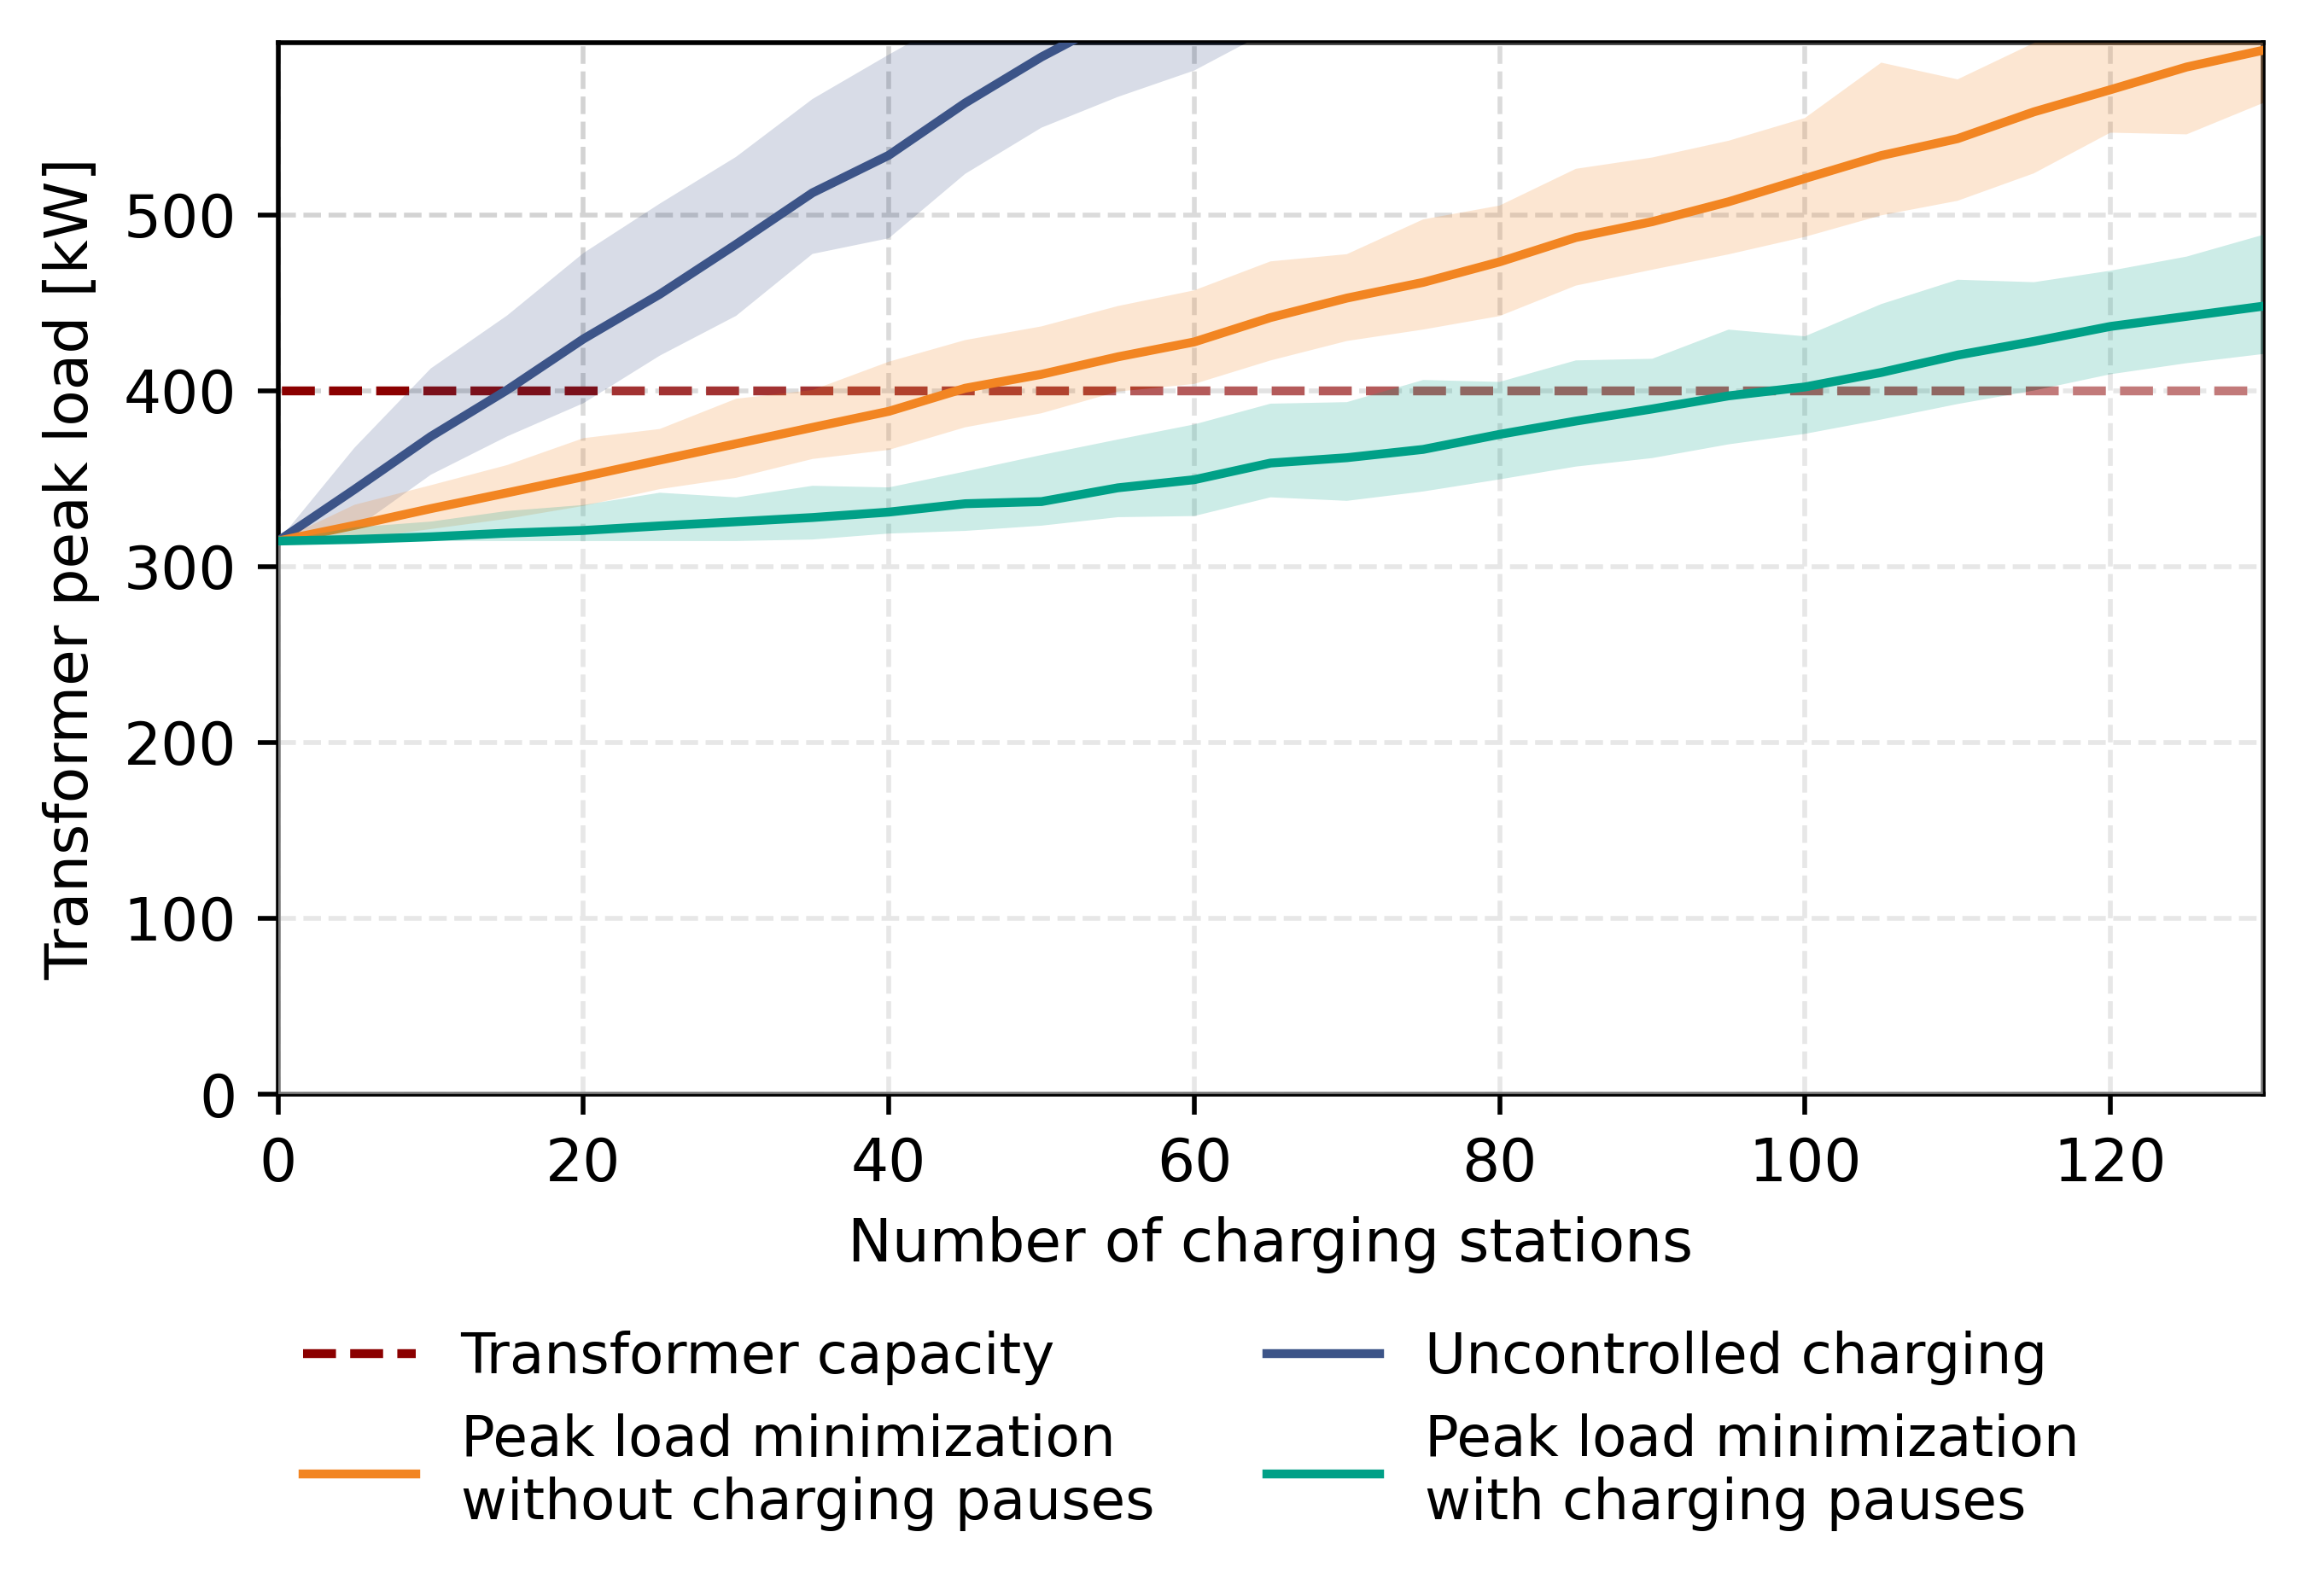

In [6]:
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

labellist=['Uncontrolled charging','Peak load minimization\nwithout charging pauses','Peak load minimization\nwith charging pauses']
colorlist=['#3c5488','#F28522','#00a087']

fig=plt.figure(figsize=(6,3.2),dpi=500)
ax1=plt.subplot(111)
plt.plot([-100,300],[400,400],color='darkred',linestyle='--',label='Transformer capacity')
for j,col in enumerate(['Uncontrolled charging','No paused charging','Paused charging']):
    ax1.stackplot(source_data_fig5.index, source_data_fig5[col+' - lower bound 95% quantile'], source_data_fig5[col+' - upper bound 95% quantile']-source_data_fig5[col+' - lower bound 95% quantile'], colors=["#ffffff00",colorlist[j]],alpha=0.2,zorder=1000)
    plt.plot(source_data_fig5.index,source_data_fig5[col+' - average value'],label=labellist[j],color=colorlist[j],zorder=1000)
plt.xlabel('Number of charging stations')
plt.ylabel('Transformer peak load [kW]')
plt.ylim(0,598)
plt.xlim(0,130)
plt.grid(axis='both',color='lightgrey',linestyle='--',zorder=-1000)
handles, labels = ax1.get_legend_handles_labels()
plt.legend(flip(handles,2),flip(labels,2),bbox_to_anchor=(0.46, -0.32),loc='center',ncol=2,fontsize=9.5,frameon=False)

## Figure 6

The following code plots Figure 6 from the paper, using the provided Source Data.

[Text(0, 0, '00:00-01:00'),
 Text(1, 0, '01:00-02:00'),
 Text(2, 0, '02:00-03:00'),
 Text(3, 0, '03:00-04:00'),
 Text(4, 0, '04:00-05:00'),
 Text(5, 0, '05:00-06:00'),
 Text(6, 0, '06:00-07:00'),
 Text(7, 0, '07:00-08:00'),
 Text(8, 0, '08:00-09:00'),
 Text(9, 0, '09:00-10:00'),
 Text(10, 0, '10:00-11:00'),
 Text(11, 0, '11:00-12:00'),
 Text(12, 0, '12:00-13:00'),
 Text(13, 0, '13:00-14:00'),
 Text(14, 0, '14:00-15:00'),
 Text(15, 0, '15:00-16:00'),
 Text(16, 0, '16:00-17:00'),
 Text(17, 0, '17:00-18:00'),
 Text(18, 0, '18:00-19:00'),
 Text(19, 0, '19:00-20:00'),
 Text(20, 0, '20:00-21:00'),
 Text(21, 0, '21:00-22:00'),
 Text(22, 0, '22:00-23:00'),
 Text(23, 0, '23:00-00:00')]

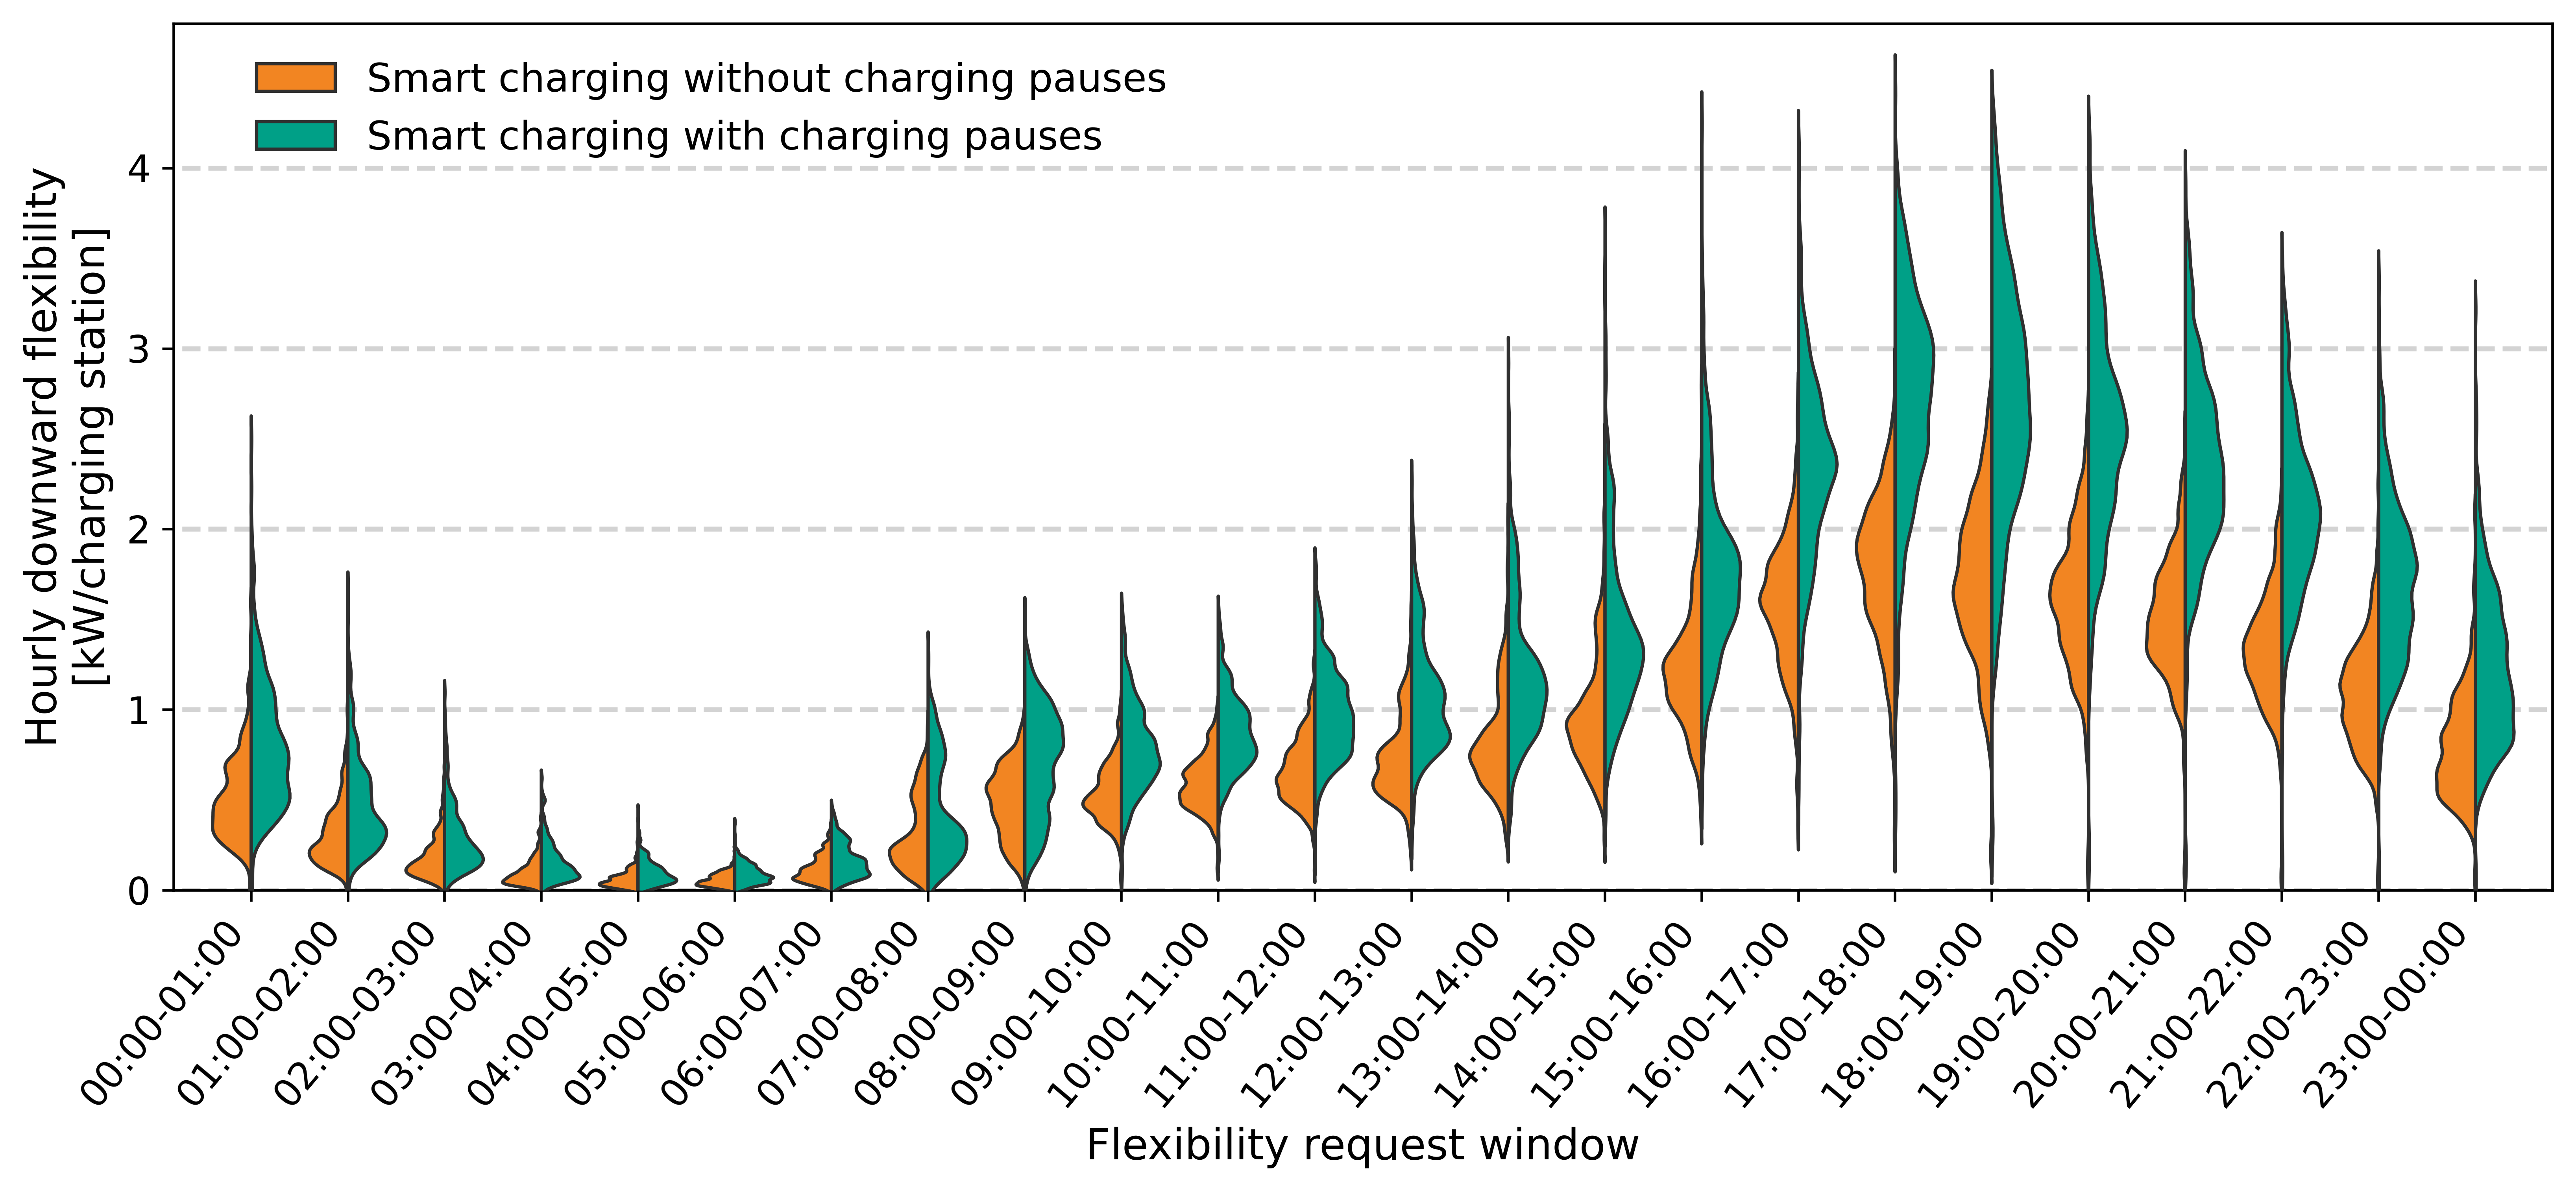

In [7]:
xlabellist=[]
for hour in range(0,24):
    if hour<9:
        time='0'+str(hour)+':00-'+'0'+str(hour+1)+':00'
    elif hour==9:
        time='0'+str(hour)+':00-'+str(hour+1)+':00'
    elif hour==23:
        time=str(hour)+':00-00:00'
    else:
        time=str(hour)+':00-'+str(hour+1)+':00'
    xlabellist+=[time]


fig=plt.figure(figsize=(13,5.5*13/15),dpi=600)
ax1=plt.subplot(111)
plt.subplots_adjust(wspace=0.13, hspace=0.4)
for i in range(0,5):
    plt.plot([-100,100],[i,i],color='lightgrey',linestyle='--',zorder=-100000)
sns.violinplot(data=source_data_fig6, x="timeframe", y="re-dispatchvalue", hue="Type of smart charging",saturation=1,hue_order=['Smart charging without charging pauses','Smart charging with charging pauses'], split=True,bw=0.18,scale='width',palette={"Smart charging without charging pauses": "#F28522","Smart charging with charging pauses": "#00a087"},inner="quart", linewidth=1,zorder=50000)
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.ylim(0,4.8)
plt.ylabel('Hourly downward flexibility\n[kW/charging station]',font='DejaVu Sans',fontsize=13)
plt.xlim(-0.8,23.8)
plt.legend(bbox_to_anchor=(0.02,0.997),fontsize=12,loc=2,frameon=False)
plt.xlabel('Flexibility request window',font='DejaVu Sans',fontsize=13)
ax1.set_xticklabels(xlabellist,rotation = 50,ha='right')


# Load sample data

Here we load a sample of the EV session data. Also, we provide an example of non-EV load data. This example is based on standard electricity consumption profiles in the Netherlands: https://www.mffbas.nl/documenten/ Note that these profiles are different from the used, measured profiles in the work, since these profiles cannot be shared.

In [8]:
sample_ev_data = pd.read_csv('data/ev_sample_data.csv',index_col=0,parse_dates=['START_rounded_CET','STOP_rounded_CET_lim'])
non_EV_load=pd.read_pickle('data/NonEVload_example.pkl')
DA_prices_NL=pd.read_pickle('data/DA_prices_NL.pkl')


# Running cost minimization model

Here we run the cost minimization model, which was used to generate figure 4 in the work. In this example, the cost minimization model will be run for the provided sample of EV charging data, using electricity prices for the Netherlands.

In [23]:
from helper_functions.cost_minimization_model import cost_optimization
from helper_functions.uncontrolled_charging_costs_model import uncontrolled_costs
timesteps=pd.date_range(dt.datetime(2022,1,1,tzinfo=pytz.timezone('CET')),dt.datetime(2022,12,31,23,45,tzinfo=pytz.timezone('CET')),freq='15Min')

#Running the model for smart charging with charging pauses
sample_ev_data['P_MIN']=[0]*len(sample_ev_data) #minimum charging current in this case is 0 kW
costs_0A=cost_optimization(sample_ev_data,DA_prices_NL,timesteps)
print('Charging costs for smart charging with charging pauses equals: '+str(round(costs_0A/sample_ev_data['VOL'].sum(),3))+' euro/kWh')

#Running the model for smart charging without charging pauses
sample_ev_data['P_MIN']=sample_ev_data['PHASE']*6*230/1000
sample_ev_data['P_MIN']=np.where(sample_ev_data['P_MIN']>sample_ev_data['P_MAX'],sample_ev_data['P_MAX'],sample_ev_data['P_MIN'])
costs_6A=cost_optimization(sample_ev_data,DA_prices_NL,timesteps)
print('Charging costs for smart charging without charging pauses equals: '+str(round(costs_6A/sample_ev_data['VOL'].sum(),3))+' euro/kWh')

#Running the model for uncontrolled charging
costs_uncontrolled=uncontrolled_costs(sample_ev_data,DA_prices_NL,timesteps)
print('Charging costs for uncontrolled charging equals: '+str(round(costs_uncontrolled/sample_ev_data['VOL'].sum(),3))+' euro/kWh')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-08
Charging costs for smart charging with charging pauses equals: 0.213 euro/kWh
Charging costs for smart charging without charging pauses equals: 0.242 euro/kWh
Charging costs for uncontrolled charging equals: 0.275 euro/kWh


# Running peak load minimization model

Here we run the peak load minimization model, which was used to generate figure 5 in the work. .In this example, thepeak loadt minimization model will be run for the provided sample of EV charging data, usingthe provided example of non-EV load profiless.

In [24]:
from helper_functions.peak_minimization_model import peakload_optimization
from helper_functions.uncontrolled_charging_peak_model import uncontrolled_peak

#Running the model for smart charging with charging pauses
sample_ev_data['P_MIN']=[0]*len(sample_ev_data) #minimum charging current in this case is 0 kW
peak_0A=peakload_optimization(sample_ev_data,timesteps,non_EV_load)
print('Peak grid load for smart charging with charging pauses equals: '+str(round(peak_0A,2))+' kW')

#Running the model for smart charging without charging pauses
sample_ev_data['P_MIN']=sample_ev_data['PHASE']*6*230/1000
sample_ev_data['P_MIN']=np.where(sample_ev_data['P_MIN']>sample_ev_data['P_MAX'],sample_ev_data['P_MAX'],sample_ev_data['P_MIN'])
peak_6A=peakload_optimization(sample_ev_data,timesteps,non_EV_load)
print('Peak grid load for smart charging with charging pauses equals: '+str(round(peak_6A,2))+' kW')

#Running the model for uncontrolled charging
peak_uncontrolled=uncontrolled_peak(sample_ev_data,timesteps,non_EV_load)
print('Peak grid load for uncontrolled charging equals: '+str(round(peak_uncontrolled,2))+' kW')

Peak grid load for smart charging with charging pauses equals: 135.78 kW
Peak grid load for smart charging with charging pauses equals: 143.81 kW
Peak grid load for uncontrolled charging equals: 157.0 kW


# Running flexibility provision minimization model

Here we run the flexibility provision model, which was used to generate figure 6 in the work. In this example, the peak load minimization model will be run for the provided sample of EV charging data for one considered hour. In the work, we ran the model for every hour of the year.

In [25]:
from helper_functions.uncontrolled_charging_model import uncontrolled_profile
from helper_functions.flexibility_offering_model import flexibility_provision_optimization

baseline_profile=uncontrolled_profile(sample_ev_data,timesteps) #baseline profile is the uncontrolled charging profile

#we consider one example hour
timesteps_flex=pd.date_range(dt.datetime(2022,8,31,22,tzinfo=pytz.timezone('CET')),dt.datetime(2022,8,31,22,45,tzinfo=pytz.timezone('CET')),freq='15Min')

#Running the model for smart charging with charging pauses
sample_ev_data['P_MIN']=[0]*len(sample_ev_data) #minimum charging current in this case is 0 kW
flex_0A=flexibility_provision_optimization(sample_ev_data,timesteps,timesteps_flex,baseline_profile)
print('Downward flexibility potential for considered hour for smart charging with charging pauses equals: '+str(round(flex_0A,2))+' kW')

#Running the model for smart charging without charging pauses
sample_ev_data['P_MIN']=sample_ev_data['PHASE']*6*230/1000
sample_ev_data['P_MIN']=np.where(sample_ev_data['P_MIN']>sample_ev_data['P_MAX'],sample_ev_data['P_MAX'],sample_ev_data['P_MIN'])
flex_6A=flexibility_provision_optimization(sample_ev_data,timesteps,timesteps_flex,baseline_profile)
print('Downward flexibility potential for considered hour for smart charging without charging pauses equals: '+str(round(flex_6A,2))+' kW')

Downward flexibility potential for considered hour for smart charging with charging pauses equals: 10.45 kW
Downward flexibility potential for considered hour for smart charging without charging pauses equals: 6.31 kW
